### Wave equation, central difference

In [1]:
from sympy import *
from IPython.display import display, Math, Latex
from Electromagnetics.SymExprTree import *

t, z = symbols('t z', real=True)
dt, dz = symbols('dt dz', real=True)
w, k = symbols(r'\omega k', real=True)
c = symbols('c')
S = symbols('S')

E = Function('E')

expr = (E(t+dt,z) - 2*E(t,z) + E(t-dt,z))/dt**2 - 1/c**2*(E(t,z+dz) - 2*E(t,z) + E(t, z-dz))/dz**2

display(Math(latex(expr)))

harm = exp(I*(w*t-k*z))
expr_wk = symExp_replaceFunction_withArgs(expr, E, (t, z), harm)
expr_wk = (expr_wk / harm).simplify()

display(Math(latex(expr_wk)))

w_sub = solve(expr_wk, w)
display(Math(latex(w_sub)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Maxwell, Yee, central difference

In [2]:
from sympy import *
from IPython.display import display, Math, Latex
from Electromagnetics.SymExprTree import *
from Electromagnetics import Misc

t, z = symbols('t z', real=True)
dt, dz = symbols('dt dz', real=True)
w, k = symbols(r'\omega k', real=True)
c = symbols('c')
S = symbols('S')
mu, eps = symbols(r'\mu \epsilon')
E_0, H_0 = symbols('E_0 H_0')

E = Function('E')
H = Function('H')

## curl E + mu d/dt H = 0
expr_Ht = (E(t, z+dz) - E(t, z))/dz + mu*(H(t+dt/2, z+dz/2) - H(t-dt/2, z+dz/2))/dt
## curl H - eps d/dt E = 0
expr_Et = (H(t+dt/2, z+dz/2) - H(t+dt/2, z-dz/2))/dz + eps*(E(t+dt, z) - E(t, z))/dt

display(Math(latex(expr_Ht)))
display(Math(latex(expr_Et)))


harm = exp(I*(w*t-k*z))
expr_Ht_wk = symExp_replaceFunction_withArgs(expr_Ht, E, (t, z), E_0*harm)
expr_Ht_wk = symExp_replaceFunction_withArgs(expr_Ht_wk, H, (t, z), H_0*harm)
expr_Ht_wk = (expr_Ht_wk / harm).simplify()

display(Math(latex(expr_Ht_wk)))

expr_Et_wk = symExp_replaceFunction_withArgs(expr_Et, E, (t, z), E_0*harm)
expr_Et_wk = symExp_replaceFunction_withArgs(expr_Et_wk, H, (t, z), H_0*harm)
expr_Et_wk = (expr_Et_wk / harm).simplify()

display(Math(latex(expr_Et_wk)))


eqs = Matrix([expr_Ht_wk, expr_Et_wk])
mat = Misc.SymEqSysLinearToMat(eqs, [E_0, H_0])
mat = Misc.SymMatrixSimplify(mat)
display(Math('mat = '+latex(mat)))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Maxwell, Colocated, central in t and central difference in z

In [6]:
from sympy import *
from IPython.display import display, Math, Latex
from Electromagnetics.SymExprTree import *
from Electromagnetics import Misc

t, z = symbols('t z', real=True)
dt, dz = symbols('dt dz', real=True)
w, k = symbols(r'\omega k', real=True)
c = symbols('c')
S = symbols('S')
mu, eps = symbols(r'\mu \epsilon')
E_0, H_0 = symbols('E_0 H_0')

E = Function('E')
H = Function('H')

## curl E + mu d/dt H = 0
expr_Ht = (E(t, z+dz) - E(t, z-dz))/(2*dz) + mu*(H(t+dt, z) - H(t-dt, z))/(2*dt)
## curl H - eps d/dt E = 0
expr_Et = (H(t, z+dz) - H(t, z-dz))/(2*dz) + eps*(E(t+dt, z) - E(t-dt, z))/(2*dt)

display(Math(latex(expr_Ht)))
display(Math(latex(expr_Et)))


harm = exp(I*(w*t-k*z))
expr_Ht_wk = symExp_replaceFunction_withArgs(expr_Ht, E, (t, z), E_0*harm)
expr_Ht_wk = symExp_replaceFunction_withArgs(expr_Ht_wk, H, (t, z), H_0*harm)
expr_Ht_wk = (expr_Ht_wk / harm).simplify()

display(Math(latex(expr_Ht_wk)))

expr_Et_wk = symExp_replaceFunction_withArgs(expr_Et, E, (t, z), E_0*harm)
expr_Et_wk = symExp_replaceFunction_withArgs(expr_Et_wk, H, (t, z), H_0*harm)
expr_Et_wk = (expr_Et_wk / harm).simplify()

display(Math(latex(expr_Et_wk)))

eqs = Matrix([expr_Ht_wk, expr_Et_wk])
mat = Misc.SymEqSysLinearToMat(eqs, [E_0, H_0])
mat = Misc.SymMatrixSimplify(mat)
display(Math('mat = '+latex(mat)))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Maxwell, Colocated, forward in t and central difference in z

In [7]:
from sympy import *
from IPython.display import display, Math, Latex
from Electromagnetics.SymExprTree import *

t, z = symbols('t z', real=True)
dt, dz = symbols('dt dz', real=True)
w, k = symbols(r'\omega k', real=True)
c = symbols('c')
S = symbols('S')
mu, eps = symbols(r'\mu \epsilon')
E_0, H_0 = symbols('E_0 H_0')

E = Function('E')
H = Function('H')

## curl E + mu d/dt H = 0
expr_Ht = (E(t, z+dz) - E(t, z-dz))/(2*dz) + mu*(H(t+dt, z) - H(t, z))/dt
## curl H - eps d/dt E = 0
expr_Et = (H(t, z+dz) - H(t, z-dz))/(2*dz) + eps*(E(t+dt, z) - E(t, z))/dt

display(Math(latex(expr_Ht)))
display(Math(latex(expr_Et)))


harm = exp(I*(w*t-k*z))
expr_Ht_wk = symExp_replaceFunction_withArgs(expr_Ht, E, (t, z), E_0*harm)
expr_Ht_wk = symExp_replaceFunction_withArgs(expr_Ht_wk, H, (t, z), H_0*harm)
expr_Ht_wk = (expr_Ht_wk / harm).simplify()

display(Math(latex(expr_Ht_wk)))

expr_Et_wk = symExp_replaceFunction_withArgs(expr_Et, E, (t, z), E_0*harm)
expr_Et_wk = symExp_replaceFunction_withArgs(expr_Et_wk, H, (t, z), H_0*harm)
expr_Et_wk = (expr_Et_wk / harm).simplify()

display(Math(latex(expr_Et_wk)))


eqs = Matrix([expr_Ht_wk, expr_Et_wk])
mat = Misc.SymEqSysLinearToMat(eqs, [E_0, H_0])
mat = Misc.SymMatrixSimplify(mat)
display(Math('mat = '+latex(mat)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Maxwell, staggered t Colocated z, forward in t and central difference in z

In [31]:
from sympy import *
from IPython.display import display, Math, Latex
from Electromagnetics.SymExprTree import *

t, z = symbols('t z', real=True)
dt, dz = symbols('dt dz', real=True)
w, k = symbols(r'\omega k', real=True)
c = symbols('c')
S = symbols('S')
mu, eps = symbols(r'\mu \epsilon')
E_0, H_0 = symbols('E_0 H_0')

E = Function('E')
H = Function('H')

## curl E + mu d/dt H = 0
expr_Ht = (E(t, z+dz) - E(t, z-dz))/(2*dz) + mu*(H(t+dt/2, z) - H(t-dt/2, z))/dt
## curl H - eps d/dt E = 0
expr_Et = (H(t+dt/2, z+dz) - H(t+dt/2, z-dz))/(2*dz) + eps*(E(t+dt, z) - E(t, z))/dt

display(Math(latex(expr_Ht)))
display(Math(latex(expr_Et)))


harm = exp(I*(w*t-k*z))
expr_Ht_wk = symExp_replaceFunction_withArgs(expr_Ht, E, (t, z), E_0*harm)
expr_Ht_wk = symExp_replaceFunction_withArgs(expr_Ht_wk, H, (t, z), H_0*harm)
expr_Ht_wk = (expr_Ht_wk / harm).simplify()

display(Math(latex(expr_Ht_wk)))

expr_Et_wk = symExp_replaceFunction_withArgs(expr_Et, E, (t, z), E_0*harm)
expr_Et_wk = symExp_replaceFunction_withArgs(expr_Et_wk, H, (t, z), H_0*harm)
expr_Et_wk = (expr_Et_wk / harm).simplify()

display(Math(latex(expr_Et_wk)))


eqs = Matrix([expr_Ht_wk, expr_Et_wk])
mat = Misc.SymEqSysLinearToMat(eqs, [E_0, H_0])
mat = Misc.SymMatrixSimplify(mat)
display(Math('mat = '+latex(mat)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Numerical implementations

In [24]:
## Yee, staggered in z, leapfrog in t, central difference in z, t

%pylab wx

import numpy as np
import matplotlib.pyplot as plt
import time

f = 1
omega = 2.0*np.pi*f
eps_0, mu_0, c = 1.0, 1.0, 1.0
z0, z1 = -10.0, 10.0

lamda = c/f
dz = lamda/30

Nz = int((z1-z0)/dz)
dz = (z1-z0)/Nz
S = 0.99
dt = S*dz/c

z = np.linspace(z0, z1, Nz, endpoint=True)
E_t = np.zeros(Nz)    ## Ex(t)
H_t = np.zeros(Nz)    ## Hy(t)
E_tp1 = np.zeros(Nz)   ## Ex(t+dt)
H_tp1 = np.zeros(Nz)   ## Hy(t+dt)

# eps_0*dE/dt = -Je + curl H    --->  E(t+dt,z) - E(t,z) = -dt/eps_0*(H(t+dt/2,z+dz/2) - H(t+dt/2,z-dz/2))/dz
# mu_0*dH/dt = Jm -curl E    --->     H(t+dt/2,z+dz/2) - H(t-dt/2,z+dz/2) = -dt/mu_0*(E(t,z+dz) - E(t,z))/dz

w_0 = omega
mod_gauss = lambda z, t: np.exp(-(t-z/c)**2)*np.cos(w_0*(t-z/c))

E_t = mod_gauss(z, t=0)
H_t = mod_gauss(z-dz/2, t=+dt/2)

t_max = 6.0
Nt = int(t_max/dt)
t = 0.0

plt.ion()
while True:
    t += dt
    E_tp1[1:-1] = E_t[1:-1] - dt/(eps_0*dz)*(H_t[2:] - H_t[:-2])
    E_tp1[0], E_tp1[-1] = 0.0, 0.0

    E_t[:] = E_tp1[:]
    
    H_tp1[1:-1] = H_t[1:-1] - dt/(mu_0*dz)*(E_t[2:] - E_t[:-2])
    H_tp1[0] = H_t[0] - dt/(mu_0*dz)*(E_t[1] - 0.0)
    H_tp1[-1] = H_t[-1] - dt/(mu_0*dz)*(0.0 - E_t[-2])
    
    H_t[:] = H_tp1[:]
    
    plot(z, E_t)
    #show()
    plt.pause(0.05)
    clf()
    
    if t>t_max:
        break
        
plt.show()       



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [25]:
## (colocated t, z) Upwinding (backward difference) in t and central difference in z

%pylab wx

import numpy as np
import matplotlib.pyplot as plt

f = 1
omega = 2.0*np.pi*f
eps_0, mu_0, c = 1.0, 1.0, 1.0
z0, z1 = -10.0, 10.0

lamda = c/f
dz = lamda/30

Nz = int((z1-z0)/dz)
dz = (z1-z0)/Nz
S = 0.99
dt = S*dz/c

z = np.linspace(z0, z1, Nz, endpoint=True)
E_t = np.zeros(Nz)    ## Ex(t)
H_t = np.zeros(Nz)    ## Hy(t)
E_t1 = np.zeros(Nz)   ## Ex(t+dt)
H_t1 = np.zeros(Nz)   ## Hy(t+dt)

# eps_0*dE/dt = -Je + curl H    --->  E(t+dt) - E(t) = -dt/eps_0*(H(z+dz) - H(z-dz))/2dz
# mu_0*dH/dt = Jm -curl E    --->  H(t+dt) - H(t) = -dt/mu_0*(E(z+dz) - E(z-dz))/2dz

w_0 = omega
mod_gauss = lambda z, t: np.exp(-(t-z/c)**2)*np.cos(w_0*(t-z/c))

E_t = mod_gauss(z, t=0)
H_t = mod_gauss(z, t=0)

t_max = 6.0
Nt = int(t_max/dt)
t = 0.0

plt.ion()
while True:
    t += dt
    E_t1[1:-1] = E_t[1:-1] - dt/(eps_0*2*dz)*(H_t[2:] - H_t[:-2])
    E_t1[0], E_t1[-1] = 0.0, 0.0
    
    H_t1[1:-1] = H_t[1:-1] - dt/(mu_0*2*dz)*(E_t[2:] - E_t[:-2])
    H_t1[0] = H_t[0] - dt/(mu_0*2*dz)*(E_t[1] - 0.0)
    H_t1[-1] = H_t[-1] - dt/(mu_0*2*dz)*(0.0 - E_t[-2])

    E_t[:] = E_t1[:]
    H_t[:] = H_t1[:]
    
    plot(z, E_t)
    plt.pause(0.05)
    clf()
    
    if t>t_max:
        break
        
plt.show()


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [26]:
## (staggered t, colocated z) leapfrog in t and central difference in z

%pylab wx

import numpy as np
import matplotlib.pyplot as plt

f = 1
omega = 2.0*np.pi*f
eps_0, mu_0, c = 1.0, 1.0, 1.0
z0, z1 = -10.0, 10.0

lamda = c/f
dz = lamda/30

Nz = int((z1-z0)/dz)
dz = (z1-z0)/Nz
S = 0.99
dt = S*dz/c

z = np.linspace(z0, z1, Nz, endpoint=True)
E_t = np.zeros(Nz)    ## Ex(t)
H_t = np.zeros(Nz)    ## Hy(t)
E_t1 = np.zeros(Nz)   ## Ex(t+dt)
H_t1 = np.zeros(Nz)   ## Hy(t+dt)

# eps_0*dE/dt = -Je + curl H    --->  E(t+dt, z) - E(t, z) = -dt/eps_0*(H(t+dt/2, z+dz) - H(t+dt/2, z-dz))/2dz
# mu_0*dH/dt = Jm -curl E    --->  H(t+dt/2, z) - H(t-dt/2,z) = -dt/mu_0*(E(t,z+dz) - E(t,z-dz))/2dz

w_0 = omega
mod_gauss = lambda z, t: np.exp(-(t-z/c)**2)*np.cos(w_0*(t-z/c))

E_t = mod_gauss(z, t=0)
H_t = mod_gauss(z, t=dt/2)
E_tm1 = mod_gauss(z, t=-dt)
H_tm1 = mod_gauss(z, t=-dt/2)

t_max = 4.0
Nt = int(t_max/dt)
t = 0.0
plt.ion()
while True:
    t += dt
    E_t1[1:-1] = E_t[1:-1] - dt/(eps_0*2*dz)*(H_t[2:] - H_t[:-2])
    E_t1[0], E_t1[-1] = 0.0, 0.0
    
    E_t[:] = E_t1

    H_t1[1:-1] = H_t[1:-1] - dt/(mu_0*2*dz)*(E_t[2:] - E_t[:-2])
    H_t1[0] = H_t[0] - dt/(mu_0*2*dz)*(E_t[1] - 0.0)
    H_t1[-1] = H_t[-1] - dt/(mu_0*2*dz)*(0.0 - E_t[-2])

    H_t[:] = H_t1
    
    plt.pause(0.05)
    clf()
    plot(z, E_t)
    
    if t>t_max:
        break
        
plt.show()


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [9]:
## colocated t, z: central difference in t and central difference in z

%pylab wx

import numpy as np
import matplotlib.pyplot as plt

f = 1
omega = 2.0*np.pi*f
eps_0, mu_0, c = 1.0, 1.0, 1.0
z0, z1 = -10.0, 10.0

lamda = c/f
dz = lamda/30

Nz = int((z1-z0)/dz)
dz = (z1-z0)/Nz
S = 0.99
dt = S*dz/c

z = np.linspace(z0, z1, Nz, endpoint=True)
E_t = np.zeros(Nz)    ## Ex(t)
H_t = np.zeros(Nz)    ## Hy(t)
E_tp1 = np.zeros(Nz)   ## Ex(t+dt)
H_tp1 = np.zeros(Nz)   ## Hy(t+dt)
E_tm1 = np.zeros(Nz)   ## Ex(t-dt)
H_tm1 = np.zeros(Nz)   ## Hy(t-dt)

# eps_0*dE/dt = -Je + curl H    --->  E(t+dt,z) - E(t-dt,z) = -2dt/eps_0*(H(t,z+dz) - H(t,z-dz))/2dz
# mu_0*dH/dt = Jm -curl E    --->  H(t+dt,z) - H(t-dt,z) = -2dt/mu_0*(E(t,z+dz) - E(t,z-dz))/2dz

w_0 = omega
mod_gauss = lambda z, t: np.exp(-(t-z/c)**2)*np.cos(w_0*(t-z/c))

E_t = mod_gauss(z, t=0)
H_t = mod_gauss(z, t=0)
E_tm1 = mod_gauss(z, t=-dt)
H_tm1 = mod_gauss(z, t=-dt)

t_max = 20.0
Nt = int(t_max/dt)
t = 0.0
plt.ion()
while True:
    t += dt
    E_tp1[1:-1] = E_tm1[1:-1] - dt/(eps_0*dz)*(H_t[2:] - H_t[:-2])
    E_tp1[0], E_tp1[-1] = 0.0, 0.0

    H_tp1[1:-1] = H_tm1[1:-1] - dt/(mu_0*dz)*(E_t[2:] - E_t[:-2])
    H_tp1[0] = H_tm1[0] - 2*dt/(mu_0*dz)*(E_t[1] - E_t[0])
    H_tp1[-1] = H_tm1[-1] - 2*dt/(mu_0*dz)*(E_t[-1] - E_t[-2])
    
    E_tm1[:] = E_t[:]
    E_t[:] = E_tp1[:]
    H_tm1[:] = H_t[:]
    H_t[:] = H_tp1[:]
    
    plt.pause(0.01)
    clf()
    plot(z, E_t)
    
    if t>t_max:
        break
        
plt.show()       



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## colocated t, z + metasurface (GSTC)

#### slab

In [8]:
## colocated t, z: central difference in t and central difference in z

%pylab wx

import numpy as np
import matplotlib.pyplot as plt

f = 1
omega = 2.0*np.pi*f
eps_0, mu_0, c = 1.0, 1.0, 1.0
z0, z1 = -10.0, 10.0

lamda = c/f
dz = lamda/200

Nz = int((z1-z0)/dz)
if Nz%2==0: 
    Nz +=1
dz = (z1-z0)/Nz
S = 0.99
dt = S*dz/c

z = np.linspace(z0, z1, Nz, endpoint=True)
E_t = np.zeros(Nz)    ## Ex(t)
H_t = np.zeros(Nz)    ## Hy(t)
E_tp1 = np.zeros(Nz)   ## Ex(t+dt)
H_tp1 = np.zeros(Nz)   ## Hy(t+dt)
E_tm1 = np.zeros(Nz)   ## Ex(t-dt)
H_tm1 = np.zeros(Nz)   ## Hy(t-dt)

# eps_0*dE/dt = -Je + curl H    --->  E(t+dt,z) - E(t-dt,z) = -Je*2dt/eps_0 -2dt/eps_0*(H(t,z+dz) - H(t,z-dz))/2dz
# mu_0*dH/dt = Jm -curl E    --->  H(t+dt,z) - H(t-dt,z) = -Jm*2dt/mu_0 -2dt/mu_0*(E(t,z+dz) - E(t,z-dz))/2dz

w_0 = omega
mod_gauss = lambda z, t: np.exp(-(t-z/c)**2)*np.cos(w_0*(t-z/c))

zg = -3
tg = zg/c
E_t = mod_gauss(z, t=tg+0)
H_t = mod_gauss(z, t=tg+0)
E_tm1 = mod_gauss(z, t=tg-dt)
H_tm1 = mod_gauss(z, t=tg-dt)

ind_ms = int(Nz/2)
print('Ms position : ', z[ind_ms])

Je_ms_t, Jm_ms_t = 0.0, 0.0
sigma_e_ms_t, sigma_m_ms_t = 0.0, 0.0
Em_ms_t, Em_ms_tm1 = 0.0, 0.0
Ep_ms_t, Ep_ms_tm1 = 0.0, 0.0
Hm_ms_t, Hm_ms_tm1 = 0.0, 0.0
Hp_ms_t, Hp_ms_tm1 = 0.0, 0.0

t_max = 10.0
Nt = int(t_max/dt)
i_t = 0
t = 0.0
plt.ion()
while True:
    sigma_e_ms_t = mod_gauss(0.0, tg+t)/E_t[ind_ms]
    sigma_m_ms_t = mod_gauss(0.0, tg+t)/H_t[ind_ms]
    
    Je_ms_t = sigma_e_ms_t*E_t[ind_ms]
    Jm_ms_t = sigma_m_ms_t*H_t[ind_ms]
    
    t += dt
    i_t += 1
    E_tp1[1:-1] = E_tm1[1:-1] - dt/(eps_0*dz)*(H_t[2:] - H_t[:-2])
    E_tp1[0], E_tp1[-1] = 0.0, 0.0
    
    E_tp1[ind_ms  ] -= Je_ms_t*dt/(eps_0*dz)
    E_tp1[ind_ms+1] -= 0.5*Je_ms_t*dt/(eps_0*dz)
    E_tp1[ind_ms-1] -= 0.5*Je_ms_t*dt/(eps_0*dz)

    H_tp1[1:-1] = H_tm1[1:-1] - dt/(mu_0*dz)*(E_t[2:] - E_t[:-2])
    H_tp1[0] = H_tm1[0] - 2*dt/(mu_0*dz)*(E_t[1] - E_t[0])
    H_tp1[-1] = H_tm1[-1] - 2*dt/(mu_0*dz)*(E_t[-1] - E_t[-2])
    
    H_tp1[ind_ms  ] -= Jm_ms_t*dt/(mu_0*dz)
    H_tp1[ind_ms+1] -= 0.5*Jm_ms_t*dt/(mu_0*dz)
    H_tp1[ind_ms-1] -= 0.5*Jm_ms_t*dt/(mu_0*dz)

    E_tm1[:] = E_t[:]
    E_t[:] = E_tp1[:]
    H_tm1[:] = H_t[:]
    H_t[:] = H_tp1[:]
    
    if i_t%20==0:
        plt.pause(0.005)
        clf()
        plot(z, E_t)
        ylim([-1.5, 1.5])
        grid()
    
    if t>t_max:
        break
        
plt.show()       



Populating the interactive namespace from numpy and matplotlib
Ms position :  0.0


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


#### metasurface (GSTC)

In [3]:
## colocated t, z: central difference in t and central difference in z

%pylab wx

import numpy as np
import matplotlib.pyplot as plt

f = 1
omega = 2.0*np.pi*f
eps_0, mu_0, c = 1.0, 1.0, 1.0
z0, z1 = -10.0, 10.0

lamda = c/f
dz = lamda/200

Nz = int((z1-z0)/dz)
if Nz%2==0: 
    Nz +=1
dz = (z1-z0)/Nz
S = 0.5
dt = S*dz/c

z = np.linspace(z0, z1, Nz, endpoint=True)
E_t = np.zeros(Nz)    ## Ex(t)
H_t = np.zeros(Nz)    ## Hy(t)
E_tp1 = np.zeros(Nz)   ## Ex(t+dt)
H_tp1 = np.zeros(Nz)   ## Hy(t+dt)
E_tm1 = np.zeros(Nz)   ## Ex(t-dt)
H_tm1 = np.zeros(Nz)   ## Hy(t-dt)

# eps_0*dE/dt = -Je + curl H    --->  E(t+dt,z) - E(t-dt,z) = -Je*2dt/eps_0 -2dt/eps_0*(H(t,z+dz) - H(t,z-dz))/2dz
# mu_0*dH/dt = Jm -curl E    --->  H(t+dt,z) - H(t-dt,z) = -Jm*2dt/mu_0 -2dt/mu_0*(E(t,z+dz) - E(t,z-dz))/2dz

w_0 = omega
mod_gauss = lambda z, t: np.exp(-(t-z/c)**2)*np.cos(w_0*(t-z/c))

zg = -3
tg = zg/c
E_t = mod_gauss(z, t=tg+0)
H_t = mod_gauss(z, t=tg+0)
E_tm1 = mod_gauss(z, t=tg-dt)
H_tm1 = mod_gauss(z, t=tg-dt)

ind_ms = int(Nz/2)
print('Ms position : ', z[ind_ms])

Je_ms_t, Jm_ms_t = 0.0, 0.0
sigma_e_ms_t, sigma_m_ms_t = 0.0, 0.0
Em_ms_t, Em_ms_tm1 = 0.0, 0.0
Ep_ms_t, Ep_ms_tm1 = 0.0, 0.0
Hm_ms_t, Hm_ms_tm1 = 0.0, 0.0
Hp_ms_t, Hp_ms_tm1 = 0.0, 0.0

Em_ms_t, Ep_ms_t = 0.0, 0.0
Hm_ms_t, Hp_ms_t = 0.0, 0.0
Em_ms_tm1, Ep_ms_tm1 = 0.0, 0.0
Hm_ms_tm1, Hp_ms_tm1 = 0.0, 0.0

t_max = 15.0
Nt = int(t_max/dt)
i_t = 0
t = 0.0
plt.ion()
while True:
    sigma_e_ms_t = mod_gauss(0.0, tg+t)/E_t[ind_ms]
    sigma_m_ms_t = mod_gauss(0.0, tg+t)/H_t[ind_ms]
    
    Je_ms_t = sigma_e_ms_t*E_t[ind_ms]
    Jm_ms_t = sigma_m_ms_t*H_t[ind_ms]
    
    Ep_ms_t = -0.5*Jm_ms_t
    Em_ms_t =  0.5*Jm_ms_t
    Hp_ms_t = -0.5*Je_ms_t
    Hm_ms_t =  0.5*Je_ms_t
    
    t += dt
    i_t += 1
    E_tp1[1:-1] = E_tm1[1:-1] - dt/(eps_0*dz)*(H_t[2:] - H_t[:-2])
    E_tp1[0], E_tp1[-1] = 0.0, 0.0
    
    E_tp1[ind_ms  ] -= Je_ms_t*dt/(eps_0*dz) ## ---> ?
    E_tp1[ind_ms+1] += - dt/(eps_0*dz)*(0 - Hp_ms_t)
    E_tp1[ind_ms-1] += - dt/(eps_0*dz)*(Hm_ms_t - 0)

    # E_tp1[ind_ms  ] -= Je_ms_t*dt/(eps_0*dz)
    # E_tp1[ind_ms+1] -= 0.5*Je_ms_t*dt/(eps_0*dz)
    # E_tp1[ind_ms-1] -= 0.5*Je_ms_t*dt/(eps_0*dz)

    
    H_tp1[1:-1] = H_tm1[1:-1] - dt/(mu_0*dz)*(E_t[2:] - E_t[:-2])
    H_tp1[0] = H_tm1[0] - 2*dt/(mu_0*dz)*(E_t[1] - E_t[0])
    H_tp1[-1] = H_tm1[-1] - 2*dt/(mu_0*dz)*(E_t[-1] - E_t[-2])

    H_tp1[ind_ms  ] -= Jm_ms_t*dt/(mu_0*dz) ## ---> ?
    H_tp1[ind_ms+1] += - dt/(mu_0*dz)*(0 - Ep_ms_t)
    H_tp1[ind_ms-1] += - dt/(mu_0*dz)*(Em_ms_t - 0)
    
    #H_tp1[ind_ms  ] -= Jm_ms_t*dt/(mu_0*dz)
    #H_tp1[ind_ms+1] -= 0.5*Jm_ms_t*dt/(mu_0*dz)
    #H_tp1[ind_ms-1] -= 0.5*Jm_ms_t*dt/(mu_0*dz)
    
    E_tm1[:] = E_t[:]
    E_t[:] = E_tp1[:]
    H_tm1[:] = H_t[:]
    H_t[:] = H_tp1[:]
    
    Em_ms_tm1 = Em_ms_t
    Ep_ms_tm1 = Ep_ms_t
    Hm_ms_tm1 = Hm_ms_t
    Hp_ms_tm1 = Hp_ms_t
    
    if i_t%20==0:
        plt.pause(0.005)
        clf()
        plot(z, E_t)
        ylim([-1.5, 1.5])
        grid()
    
    if t>t_max:
        break
        
plt.show()       



Populating the interactive namespace from numpy and matplotlib
Ms position :  0.0


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### time reversal

#### slab

In [37]:
## colocated t, z: central difference in t and central difference in z

%pylab wx

import numpy as np
import matplotlib.pyplot as plt

f = 1
omega = 2.0*np.pi*f
eps_0, mu_0, c = 1.0, 1.0, 1.0
z0, z1 = -10.0, 10.0

lamda = c/f
dz = lamda/200

Nz = int((z1-z0)/dz)
if Nz%2==0: 
    Nz +=1
dz = (z1-z0)/Nz
S = 0.99
dt = S*dz/c

z = np.linspace(z0, z1, Nz, endpoint=True)
E_t = np.zeros(Nz)    ## Ex(t)
H_t = np.zeros(Nz)    ## Hy(t)
E_tp1 = np.zeros(Nz)   ## Ex(t+dt)
H_tp1 = np.zeros(Nz)   ## Hy(t+dt)
E_tm1 = np.zeros(Nz)   ## Ex(t-dt)
H_tm1 = np.zeros(Nz)   ## Hy(t-dt)

# eps_0*dE/dt = -Je + curl H    --->  E(t+dt,z) - E(t-dt,z) = -Je*2dt/eps_0 -2dt/eps_0*(H(t,z+dz) - H(t,z-dz))/2dz
# mu_0*dH/dt = Jm -curl E    --->  H(t+dt,z) - H(t-dt,z) = -Jm*2dt/mu_0 -2dt/mu_0*(E(t,z+dz) - E(t,z-dz))/2dz

w_0 = omega
mod_gauss = lambda z, t: np.exp(-(t-z/c)**2)*np.cos(w_0*(t-z/c))
chirped_gauss = lambda z, t: np.exp(-(t-z/c)**2)*np.cos(w_0*(t-1.5-z/c)**2)
def mod_inv_gauss(z, t, lam=10.0, mu=3.0): 
    u = t - z/c
    u = (u>0)*u + (u<=0)*1.0e-5
    return np.sqrt(lam/(2.0*np.pi*u**3))*np.exp((-lam*(u-mu)**2)/(2*mu**2*u))*np.cos(w_0*u)



zg = -3           ## inv_gauss: -1   chirped_gauss:-3
tg = zg/c

st_func_inc = lambda z, t: chirped_gauss(z, t+tg)
#st_func_inc = lambda z, t: mod_inv_gauss(z, t)

E_t = st_func_inc(z, t=tg+0)
H_t = st_func_inc(z, t=tg+0)
E_tm1 = st_func_inc(z, t=tg-dt)
H_tm1 = st_func_inc(z, t=tg-dt)

ind_ms = int(Nz/2)
print('Ms position : ', z[ind_ms])

Je_ms_t, Jm_ms_t = 0.0, 0.0
sigma_e_ms_t, sigma_m_ms_t = 0.0, 0.0
Em_ms_t, Em_ms_tm1 = 0.0, 0.0
Ep_ms_t, Ep_ms_tm1 = 0.0, 0.0
Hm_ms_t, Hm_ms_tm1 = 0.0, 0.0
Hp_ms_t, Hp_ms_tm1 = 0.0, 0.0

T_tr = 6.0    ## inv_gauss: 10      chirped_gauss:6.0
st_func_trans = lambda z, t: st_func_inc(z, T_tr-t)

plt.figure()
plot(np.linspace(-10, 10, 500), st_func_inc(0.0, np.linspace(-10, 10, 500)), 'r')
plot(np.linspace(-10, 10, 500), st_func_trans(0.0, np.linspace(-10, 10, 500)), 'b')
plt.show()

t_max = 15.0
Nt = int(t_max/dt)
t = 0.0
i_t = 0
plt.figure()
plt.ion()
while True:
    sigma_e_ms_t = (st_func_inc(0.0, tg+t)-st_func_trans(0.0, tg+t))/E_t[ind_ms]
    sigma_m_ms_t = (st_func_inc(0.0, tg+t)-st_func_trans(0.0, tg+t))/H_t[ind_ms]
    
    Je_ms_t = sigma_e_ms_t*E_t[ind_ms]
    Jm_ms_t = sigma_m_ms_t*H_t[ind_ms]
    
    if abs(E_t[ind_ms])==0.0:
        Je_ms_t = 0.0
    if abs(H_t[ind_ms])==0.0:
        Jm_ms_t = 0.0
    
    t += dt
    i_t += 1
    E_tp1[1:-1] = E_tm1[1:-1] - dt/(eps_0*dz)*(H_t[2:] - H_t[:-2])
    E_tp1[0], E_tp1[-1] = 0.0, 0.0
    
    E_tp1[ind_ms  ] -= Je_ms_t*dt/(eps_0*dz)
    E_tp1[ind_ms+1] -= 0.5*Je_ms_t*dt/(eps_0*dz)
    E_tp1[ind_ms-1] -= 0.5*Je_ms_t*dt/(eps_0*dz)

    H_tp1[1:-1] = H_tm1[1:-1] - dt/(mu_0*dz)*(E_t[2:] - E_t[:-2])
    H_tp1[0] = H_tm1[0] - 2*dt/(mu_0*dz)*(E_t[1] - E_t[0])
    H_tp1[-1] = H_tm1[-1] - 2*dt/(mu_0*dz)*(E_t[-1] - E_t[-2])
    
    H_tp1[ind_ms  ] -= Jm_ms_t*dt/(mu_0*dz)
    H_tp1[ind_ms+1] -= 0.5*Jm_ms_t*dt/(mu_0*dz)
    H_tp1[ind_ms-1] -= 0.5*Jm_ms_t*dt/(mu_0*dz)

    E_tm1[:] = E_t[:]
    E_t[:] = E_tp1[:]
    H_tm1[:] = H_t[:]
    H_t[:] = H_tp1[:]
    
    if i_t%20==0:
        plt.pause(0.005)
        clf()
        plot(z, E_t)
        ylim([-1.5, 1.5])
        grid()
    
    if t>t_max:
        break
        
plt.show()       



Populating the interactive namespace from numpy and matplotlib
Ms position :  0.0


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## 2D time reversal

#### slab

In [4]:
## colocated t, z: central difference in t and central difference in z

%pylab wx 

import numpy as np
import matplotlib.pyplot as plt
import os


subfold = "Gaussian"      ## Gaussian, Chirp, Gaussian_Deriv

eps_0, mu_0, c = 1.0, 1.0, 1.0
f = 1.0
omega = 2.0*np.pi*f
lamda = c/f

z0, z1 = -40.0*lamda, 40.0*lamda
y0, y1 = -40.0*lamda, 40.0*lamda


dz = lamda/20
dy = dz

Nz = int((z1-z0)/dz)
Ny = int((y1-y0)/dy)
if Nz%2==0: 
    Nz +=1
if Ny%2==0: 
    Ny +=1
dz = (z1-z0)/Nz
dy = (y1-y0)/Ny
S = 0.99
dt = S*dz/c/np.sqrt(2.0)

z = np.linspace(z0, z1, Nz, endpoint=True)
y = np.linspace(y0, y1, Ny, endpoint=True)
Z, Y = np.meshgrid(z, y, indexing='ij')

Ex_t = np.zeros((Nz, Ny))    ## Ex(t)
Hy_t = np.zeros((Nz, Ny))    ## Hy(t)
Hz_t = np.zeros((Nz, Ny))    ## Hz(t)
Ex_tp1 = np.zeros((Nz, Ny))   ## Ex(t+dt)
Hy_tp1 = np.zeros((Nz, Ny))   ## Hy(t+dt)
Hz_tp1 = np.zeros((Nz, Ny))   ## Hz(t+dt)
Ex_tm1 = np.zeros((Nz, Ny))   ## Ex(t-dt)
Hy_tm1 = np.zeros((Nz, Ny))   ## Hy(t-dt)
Hz_tm1 = np.zeros((Nz, Ny))   ## Hz(t-dt)

# eps_0*dE/dt = -Je + curl H    --->  
# E_x(t+dt,z) - E_x(t-dt,z) = -Je_x*2dt/eps_0 
#                             -2dt/eps_0*[(H_y(t,z+dz) - H_y(t,z-dz))/2dz - (H_z(t,y+dy) - H_z(t,y-dy))/2dy]  
# mu_0*dH/dt = Jm -curl E    --->  
# H_y(t+dt,z,y) - H_y(t-dt,z,y) = -Jm_y*2dt/mu_0 -2dt/mu_0*(E_x(t,z+dz,y) - E_x(t,z-dz,y))/2dz
# H_z(t+dt,z,y) - H_z(t-dt,z,y) = -Jm_z*2dt/mu_0 +2dt/mu_0*(E_x(t,z,y+dy) - E_x(t,z,y-dy))/2dy

w_0 = omega
mod_gauss_t = lambda t, alpha=1.0: np.exp(-t**2/alpha**2)*np.cos(w_0*t)

mod_gauss_deriv_t = lambda t, alpha=1.0: -t*np.exp(-t**2/alpha**2)*np.cos(w_0*t)
mod_gauss_deriv_2_t = lambda t, alpha=1.0: (-1+2*t**2/alpha**2)*np.exp(-t**2/alpha**2)*np.cos(w_0*t)

gauss_t = lambda t, alpha=1.0: np.exp(-t**2/alpha**2)
gauss_deriv_t = lambda t, alpha=1.0: -t*np.exp(-t**2/alpha**2)
gauss_deriv_2_t = lambda t, alpha=1.0: (-1+2*t**2/alpha**2)*np.exp(-t**2/alpha**2)

##  wc_l, wc_u = 2.0*w_0, 0.2*w_0 for chirp down and opposite for up
def chirped_gauss_t(t, alpha=1.0): 
    wc_l, wc_u = 2.0*w_0, 0.2*w_0
    tc_l, tc_u = -3.0*alpha, 3.0*alpha
    w_t = wc_l*(t-tc_u)/(tc_l-tc_u) + wc_u*(t-tc_l)/(tc_u-tc_l)
    return np.exp(-t**2/alpha**2)*np.cos(w_t*t)


#down chirp: np.cos(w_0*(t-1.5*alpha)**2)
#up chirp: np.cos(w_0*(t+1.5*alpha)**2)


def mod_inv_gauss_t(t, lam=10.0, mu=3.0): 
    u = t
    u = (u>0)*u + (u<=0)*1.0e-5
    return np.sqrt(lam/(2.0*np.pi*u**3))*np.exp((-lam*(u-mu)**2)/(2*mu**2*u))*np.cos(w_0*u)

gauss_y = lambda y, z0=1.0, alpha=1.0: np.exp(-y**2/alpha**2)#*np.cos(w_0/c*(np.sqrt(y**2 + z0**2)-z0))


def tilted_gaussian_aperture(y, k, W, r0, theta):
    """ r0: focal distance
        W:  width
        theta: tilt angle
        k: wave vector
        y: cross section sample points
    """
    b = k*W**2/2
    a = 1/b - 1j/r0
    _y_ = y*np.cos(theta)
    _z_ = y*np.sin(theta)
    u = 1.0/(1.0-1j*a*_z_)*np.exp(-1j*k*_z_ - k*a/2*_y_**2/(1 - 1j*a*_z_))
    return np.real(u)


def tilted_gaussian_aperture_data(y, i_t, prefix):
    ## 45 degree tilted gaussian. reads from saved diagonal data
    diag_params = np.load('other/ST-MS/{}/{}Params_diag.npz'.format(subfold, prefix))
    nd_chunk = diag_params['nd_chunk']
    id_ch = i_t%nd_chunk
    _dy_ = diag_params['dy']
    _dz_ = diag_params['dz']
    assert abs(_dy_-_dz_)/_dy_<1.0e-9
    _dt_ = diag_params['dt']
    assert abs(_dt_-dt)/_dt_<1.0e-9
    _y_ = diag_params['y']
    _Ny_ = len(_y_)
    _y_d_ = _y_*np.sqrt(2.0)
    file_i_t = 'other/ST-MS/{}/{}EH_d_{}.npz'.format(subfold, prefix, str(int(i_t/nd_chunk)))
    if os.path.exists(file_i_t):
        diag_fields = np.load(file_i_t)
        #print(diag_fields.files)
        Ex_d_ = diag_fields['Ex_d'] 
        Hy_d_ = diag_fields['Hy_d']
        Hz_d_ = diag_fields['Hz_d']
        Ex_d, Hy_d, Hz_d = np.zeros(_Ny_), np.zeros(_Ny_), np.zeros(_Ny_)
        if id_ch<Ex_d_.shape[0]:
            Ex_d = Ex_d_[id_ch,:]
            Hy_d = Hy_d_[id_ch,:]
            Hz_d = Hz_d_[id_ch,:]
        _Ex_ = np.zeros(_Ny_)
        _Hy_ = np.zeros(_Ny_)
        _Hz_ = np.zeros(_Ny_)
        for i in range(len(y)):
            y_i = y[i]
            ind_y_0  = np.argmax(_y_d_ > y_i)
            assert ind_y_0>=0 and ind_y_0<_Ny_-1
            ind_y_1 = ind_y_0+1
            _Ex_[i] = Ex_d[ind_y_0] + (y_i - _y_d_[ind_y_0])/(_y_d_[ind_y_1] - _y_d_[ind_y_0])*Ex_d[ind_y_1]
            _Hy_[i] = Hy_d[ind_y_0] + (y_i - _y_d_[ind_y_0])/(_y_d_[ind_y_1] - _y_d_[ind_y_0])*Hy_d[ind_y_1]
            _Hz_[i] = Hz_d[ind_y_0] + (y_i - _y_d_[ind_y_0])/(_y_d_[ind_y_1] - _y_d_[ind_y_0])*Hz_d[ind_y_1]
            
        Jm_ms = -_Ex_
        Je_ms = -(_Hy_ - _Hz_)/np.sqrt(2.0)
        return Je_ms, Jm_ms
        
    else:
        print(file_i_t, ": was not found.")
        _Ex_ = np.zeros(_Ny_)
        _Hy_ = np.zeros(_Ny_)
        _Hz_ = np.zeros(_Ny_)

        Jm_ms = -_Ex_
        Je_ms = -(_Hy_ - _Hz_)/np.sqrt(2.0)
        return Je_ms, Jm_ms

def horizontal_gaussian_aperture_data(y, i_t, prefix):
    ## 45 degree tilted gaussian. reads from saved diagonal data
    vert_params = np.load('other/ST-MS/{}/{}Params_vert.npz'.format(subfold, prefix))
    nv_chunk = vert_params['nv_chunk']
    id_ch = i_t%nv_chunk
    _dy_ = vert_params['dy']
    _dz_ = vert_params['dz']
    assert abs(_dy_-_dz_)/_dy_<1.0e-9
    _dt_ = vert_params['dt']
    assert abs(_dt_-dt)/_dt_<1.0e-9
    _y_ = vert_params['y']
    _Ny_ = len(_y_)
    _y_v_ = _y_
    file_i_t = 'other/ST-MS/{}/{}EH_v_{}.npz'.format(subfold, prefix, str(int(i_t/nv_chunk)))
    if os.path.exists(file_i_t):
        vert_fields = np.load(file_i_t)
        #print(vert_fields.files)
        Ex_v_ = vert_fields['Ex_v'] 
        Hy_v_ = vert_fields['Hy_v']
        Hz_v_ = vert_fields['Hz_v']
        Ex_v, Hy_v, Hz_v = np.zeros(_Ny_), np.zeros(_Ny_), np.zeros(_Ny_)
        if id_ch<Ex_v_.shape[0]:
            Ex_v = Ex_v_[id_ch,:]
            Hy_v = Hy_v_[id_ch,:]
            Hz_v = Hz_v_[id_ch,:]
            
        Jm_ms = -Ex_v
        Je_ms = -Hy_v
        return Je_ms, Jm_ms
        
    else:
        print(file_i_t, ": was not found.")
        _Ex_ = np.zeros(_Ny_)
        _Hy_ = np.zeros(_Ny_)
        _Hz_ = np.zeros(_Ny_)

        Jm_ms = -_Ex_
        Je_ms = -_Hy_
        return Je_ms, Jm_ms


## _df : diagonal flipped

prefix = "gaussian_to_flipderiv_downup_" ## "gaussian_deriv_2_" "gaussian_deriv_" / "gaussian_" / "chirp_up_" / "chirp_down_"
#st_func_inc = lambda t: mod_gauss_deriv_2_t(t, alpha=2.5)
#st_func_inc = lambda t: mod_gauss_deriv_t(t, alpha=2.5)
#st_func_inc = lambda t: mod_gauss_t(t, alpha=2.5)
#st_func_inc = lambda t: chirped_gauss_t(t, alpha=3.5)

st_func_inc = lambda t: (-gauss_t(t+0.25/f, alpha=2.5/f) + gauss_t(t-0.25/f, alpha=2.5/f))/0.18
#st_func_inc = lambda t: (gauss_deriv_t(t+0.25/f, alpha=2.5/f) - gauss_deriv_t(t-0.25/f, alpha=2.5/f))/0.48


plt.figure()
_t_ = np.linspace(-10.0/f, 10.0/f, 200)
plt.plot(_t_, st_func_inc(_t_))
plt.show()
print("max |f_t| : ", np.max(np.abs(st_func_inc(_t_))))

z_src = -30.0*lamda
ind_src = np.argmin(np.abs(z - z_src))
print('Source position : ', z[ind_src])

z_ms = 0.0
ind_ms = np.argmin(np.abs(z - z_ms))
print('Ms position : ', z[ind_ms])

Jex_ms_t, Jmy_ms_t = np.zeros((1, Ny)), np.zeros((1, Ny))
sigma_e_ms_t, sigma_m_ms_t = np.zeros((1, Ny)), np.zeros((1, Ny))
Exm_ms_t, Exm_ms_tm1 = np.zeros((1, Ny)), np.zeros((1, Ny))
Exp_ms_t, Exp_ms_tm1 = np.zeros((1, Ny)), np.zeros((1, Ny))
Hym_ms_t, Hym_ms_tm1 = np.zeros((1, Ny)), np.zeros((1, Ny))
Hyp_ms_t, Hyp_ms_tm1 = np.zeros((1, Ny)), np.zeros((1, Ny))

Jex_src_t, Jmy_src_t = np.zeros((1, Ny)), np.zeros((1, Ny))


n_tot_chunk = 50    ## total domain chunk
save_tot_every = 10  ## saves every 10 time steps
nd_chunk = 200      ## diagonal_chunk
nv_chunk = nd_chunk     ## vertical_chunk

flip_diag = False        ## True: downward
write_diag_fields_to_file = False        ## diagonal cross section
Ex_diagonal, Hy_diagonal, Hz_diagonal = [None]*3
if write_diag_fields_to_file:
    Ex_diagonal = np.zeros((nd_chunk, Ny))
    Hy_diagonal = np.zeros((nd_chunk, Ny))
    Hz_diagonal = np.zeros((nd_chunk, Ny))
    np.savez('other/ST-MS/{}/{}Params_diag'.format(subfold, prefix), nd_chunk=nd_chunk, dz=dz, dy=dy, S=S, dt=dt, y=y, z=z)
    
write_vert_fields_to_file = True      ## vertical cross section
Ex_vertical, Hy_vertical, Hz_vertical = [None]*3
if write_vert_fields_to_file:
    Ex_vertical = np.zeros((nv_chunk, Ny))
    Hy_vertical = np.zeros((nv_chunk, Ny))
    Hz_vertical = np.zeros((nv_chunk, Ny))
    np.savez('other/ST-MS/{}/{}Params_vert'.format(subfold, prefix), nv_chunk=nv_chunk, dz=dz, dy=dy, S=S, dt=dt, y=y, z=z)


write_all_fields_to_file = True
Ex_tot_t, Hy_tot_t, Hz_tot_t = [None]*3
if write_all_fields_to_file:
    Ex_tot_t = np.zeros((n_tot_chunk, Nz, Ny))
    Hy_tot_t = np.zeros((n_tot_chunk, Nz, Ny))
    Hz_tot_t = np.zeros((n_tot_chunk, Nz, Ny))
    np.savez('other/ST-MS/{}/{}Params_tot'.format(subfold, prefix), n_tot_chunk=n_tot_chunk, save_tot_every=save_tot_every, dz=dz, dy=dy, S=S, dt=dt, y=y, z=z)

write_susceptibilities_to_file = True
ms_type = "mono"  ## "mono" / "bi"
X_ee_t, X_mm_t, X_me_t, X_em_t = [None]*4
Pex_t, Pmy_t = [None]*2
truncate_X_ = True

e_max = 1.0/(dy/2.0)
E_thresh = 0.01*e_max
if write_susceptibilities_to_file:
    Pex_t, Pmy_t = np.zeros((1, Ny)), np.zeros((1, Ny))
    X_ee_t = np.zeros((nv_chunk, Ny))
    X_mm_t = np.zeros((nv_chunk, Ny))
    if ms_type=="bi":
        X_em_t = np.zeros((nv_chunk, Ny))
        X_me_t = np.zeros((nv_chunk, Ny))

    
plot_dynamic_fields = True
    
t_max = 60.0/f
Nt = int(t_max/dt)
i_t = 0
t = 0.0
if plot_dynamic_fields:
    plt.figure()
    plt.ion()

while True:
    id_ch = i_t%nd_chunk
    if write_diag_fields_to_file:
        if not flip_diag:
            for i in range(min(Ny,Nz)):
                Ex_diagonal[id_ch, i] = Ex_t[i, i]
                Hy_diagonal[id_ch, i] = Hy_t[i, i]
                Hz_diagonal[id_ch, i] = Hz_t[i, i]
        else:
            for i in range(min(Ny,Nz)):
                Ex_diagonal[id_ch, i] = Ex_t[Nz-1-i, i]
                Hy_diagonal[id_ch, i] = Hy_t[Nz-1-i, i]
                Hz_diagonal[id_ch, i] = Hz_t[Nz-1-i, i]

        if id_ch==nd_chunk-1:
            np.savez('other/ST-MS/{}/{}EH_d_{}'.format(subfold, prefix, str(int(i_t/nd_chunk))), i_t=i_t, Ex_d=Ex_diagonal, Hy_d=Hy_diagonal, Hz_d=Hz_diagonal)
    if write_vert_fields_to_file:
        Ex_vertical[id_ch, :] = Ex_t[ind_ms, :]
        Hy_vertical[id_ch, :] = Hy_t[ind_ms, :]
        Hz_vertical[id_ch, :] = Hz_t[ind_ms, :]
        assert nd_chunk==nv_chunk
        if id_ch==nv_chunk-1:
            np.savez('other/ST-MS/{}/{}EH_v_{}'.format(subfold, prefix, str(int(i_t/nv_chunk))), i_t=i_t, Ex_v=Ex_vertical, Hy_v=Hy_vertical, Hz_v=Hz_vertical)
    
    _jem_ = gauss_y(y, z0=20.0*lamda, alpha=12.0*lamda)*st_func_inc(t-8.0/f)
    ##_jem_ = gauss_y_theta_E(y, alpha=3.0, theta=30/180*np.pi)*st_func_inc(t-8.0)
    ##_jem_ = tilted_gaussian_aperture(y, k=omega/c, W=4.0, r0=40.0, theta=0.0/180*np.pi)*st_func_inc(t-8.0)
    Jex_src_t[0, :] = _jem_
    Jmy_src_t[0, :] = _jem_
    
    j_ex_horiz, j_my_horiz = horizontal_gaussian_aperture_data(y, i_t, "gaussian_")   ## "gaussian_"/"chirp_down_"
    Jex_ms_t[0, :] = -j_ex_horiz*dy/2
    Jmy_ms_t[0, :] = -j_my_horiz*dy/2
    
    j_ex_tilted, j_my_tilted = tilted_gaussian_aperture_data(y, i_t, "gaussian_flip_")    ## "gaussian_deriv_"/"chirp_up_"
    Jex_ms_t[0, :] += j_ex_tilted*dy/2*np.sqrt(2.0)
    Jmy_ms_t[0, :] += j_my_tilted*dy/2*np.sqrt(2.0)

    j_ex_tilted_2, j_my_tilted_2 = tilted_gaussian_aperture_data(y, i_t, "gaussian_deriv_")
    Jex_ms_t[0, :] += j_ex_tilted_2*dy/2*np.sqrt(2.0)
    Jmy_ms_t[0, :] += j_my_tilted_2*dy/2*np.sqrt(2.0)

    
    if i_t<(z_ms-z_src)/dz+1:
        Jex_ms_t[0, :] *= 0.0
        Jmy_ms_t[0, :] *= 0.0
    print(".", end='')

    if write_susceptibilities_to_file:
        Pex_t[0, :] += Jex_ms_t[0, :]*dt
        Pmy_t[0, :] += Jmy_ms_t[0, :]*dt
        X_ee_t[id_ch, :] = Pex_t[0, :]/Ex_t[ind_ms, :]
        X_mm_t[id_ch, :] = Pmy_t[0, :]/Hy_t[ind_ms, :]
        #print("X_ee : ", X_ee_t[id_ch, :], Pex_t[0, :], Ex_t[ind_ms, :])
        #print('X_ee - X_mm : ', np.max(np.abs(X_ee_t[id_ch, :]-X_mm_t[id_ch, :])), end=" ")
        if truncate_X_:
            X_ee_t[id_ch, :] = X_ee_t[id_ch, :]*(np.abs(Ex_t[ind_ms, :])>E_thresh)
            X_mm_t[id_ch, :] = X_mm_t[id_ch, :]*(np.abs(Ex_t[ind_ms, :])>E_thresh)
        assert nd_chunk==nv_chunk
        if id_ch==nv_chunk-1:
            np.savez('other/ST-MS/{}/{}X_{}'.format(subfold, prefix, str(int(i_t/nv_chunk))), i_t=i_t, X_ee_t=X_ee_t, X_mm_t=X_mm_t, X_em_t=X_em_t, X_me_t=X_me_t)

    
    i_t += 1
    t += dt
    Ex_tp1[1:-1, :] = Ex_tm1[1:-1, :] - dt/(eps_0*dz)*(Hy_t[2:, :] - Hy_t[:-2, :])
    Ex_tp1[:, 1:-1] += dt/(eps_0*dy)*(Hz_t[:, 2:] - Hz_t[:, :-2])
    Ex_tp1[0, :], Ex_tp1[-1, :] = 0.0, 0.0
    Ex_tp1[:, 0], Ex_tp1[:, -1] = 0.0, 0.0
    
    Ex_tp1[ind_src  , :] -= Jex_src_t[0, :]*dt/(eps_0*dy*dz)
    Ex_tp1[ind_src+1, :] -= 0.5*Jex_src_t[0, :]*dt/(eps_0*dy*dz)
    Ex_tp1[ind_src-1, :] -= 0.5*Jex_src_t[0, :]*dt/(eps_0*dy*dz)
    Ex_tp1[ind_src, 1:] -= 0.5*Jex_src_t[0, :-1]*dt/(eps_0*dy*dz)
    Ex_tp1[ind_src,:-1] -= 0.5*Jex_src_t[0, 1: ]*dt/(eps_0*dy*dz)
    Ex_tp1[ind_src+1, 1:] -= 0.25*Jex_src_t[0, :-1]*dt/(eps_0*dy*dz)
    Ex_tp1[ind_src+1,:-1] -= 0.25*Jex_src_t[0, 1: ]*dt/(eps_0*dy*dz)
    Ex_tp1[ind_src-1, 1:] -= 0.25*Jex_src_t[0, :-1]*dt/(eps_0*dy*dz)
    Ex_tp1[ind_src-1,:-1] -= 0.25*Jex_src_t[0, 1: ]*dt/(eps_0*dy*dz)

    Ex_tp1[ind_ms  , :] -= Jex_ms_t[0, :]*dt/(eps_0*dy*dz)
    Ex_tp1[ind_ms+1, :] -= 0.5*Jex_ms_t[0, :]*dt/(eps_0*dy*dz)
    Ex_tp1[ind_ms-1, :] -= 0.5*Jex_ms_t[0, :]*dt/(eps_0*dy*dz)
    Ex_tp1[ind_ms, 1:] -= 0.5*Jex_ms_t[0, :-1]*dt/(eps_0*dy*dz)
    Ex_tp1[ind_ms,:-1] -= 0.5*Jex_ms_t[0, 1: ]*dt/(eps_0*dy*dz)
    Ex_tp1[ind_ms+1, 1:] -= 0.25*Jex_ms_t[0, :-1]*dt/(eps_0*dy*dz)
    Ex_tp1[ind_ms+1,:-1] -= 0.25*Jex_ms_t[0, 1: ]*dt/(eps_0*dy*dz)
    Ex_tp1[ind_ms-1, 1:] -= 0.25*Jex_ms_t[0, :-1]*dt/(eps_0*dy*dz)
    Ex_tp1[ind_ms-1,:-1] -= 0.25*Jex_ms_t[0, 1: ]*dt/(eps_0*dy*dz)

    Hy_tp1[1:-1, :] = Hy_tm1[1:-1, :] - dt/(mu_0*dz)*(Ex_t[2:, :] - Ex_t[:-2, :])
    Hy_tp1[0, :] = Hy_tm1[0, :] - 2*dt/(mu_0*dz)*(Ex_t[1, :] - Ex_t[0, :])
    Hy_tp1[-1, :] = Hy_tm1[-1, :] - 2*dt/(mu_0*dz)*(Ex_t[-1, :] - Ex_t[-2, :])

    Hz_tp1[:, 1:-1] = Hz_tm1[:, 1:-1] + dt/(mu_0*dy)*(Ex_t[:, 2:] - Ex_t[:, :-2])
    Hz_tp1[:, 0] = Hz_tm1[:, 0] + 2*dt/(mu_0*dy)*(Ex_t[:, 1] - Ex_t[:, 0])
    Hz_tp1[:,-1] = Hz_tm1[:,-1] + 2*dt/(mu_0*dy)*(Ex_t[:, -1] - Ex_t[:, -2])

    
    Hy_tp1[ind_src , :] -= Jmy_src_t[0, :]*dt/(mu_0*dy*dz)
    Hy_tp1[ind_src+1,:] -= 0.5*Jmy_src_t[0, :]*dt/(mu_0*dy*dz)
    Hy_tp1[ind_src-1,:] -= 0.5*Jmy_src_t[0, :]*dt/(mu_0*dy*dz)
    Hy_tp1[ind_src  , 1:] -= 0.5*Jmy_src_t[0,:-1]*dt/(mu_0*dy*dz)
    Hy_tp1[ind_src  ,:-1] -= 0.5*Jmy_src_t[0, 1:]*dt/(mu_0*dy*dz)
    Hy_tp1[ind_src+1, 1:] -= 0.25*Jmy_src_t[0,:-1]*dt/(mu_0*dy*dz)
    Hy_tp1[ind_src+1,:-1] -= 0.25*Jmy_src_t[0, 1:]*dt/(mu_0*dy*dz)
    Hy_tp1[ind_src-1, 1:] -= 0.25*Jmy_src_t[0,:-1]*dt/(mu_0*dy*dz)
    Hy_tp1[ind_src-1,:-1] -= 0.25*Jmy_src_t[0, 1:]*dt/(mu_0*dy*dz)

    Hy_tp1[ind_ms , :] -= Jmy_ms_t[0, :]*dt/(mu_0*dy*dz)
    Hy_tp1[ind_ms+1,:] -= 0.5*Jmy_ms_t[0, :]*dt/(mu_0*dy*dz)
    Hy_tp1[ind_ms-1,:] -= 0.5*Jmy_ms_t[0, :]*dt/(mu_0*dy*dz)
    Hy_tp1[ind_ms  , 1:] -= 0.5*Jmy_ms_t[0,:-1]*dt/(mu_0*dy*dz)
    Hy_tp1[ind_ms  ,:-1] -= 0.5*Jmy_ms_t[0, 1:]*dt/(mu_0*dy*dz)
    Hy_tp1[ind_ms+1, 1:] -= 0.25*Jmy_ms_t[0,:-1]*dt/(mu_0*dy*dz)
    Hy_tp1[ind_ms+1,:-1] -= 0.25*Jmy_ms_t[0, 1:]*dt/(mu_0*dy*dz)
    Hy_tp1[ind_ms-1, 1:] -= 0.25*Jmy_ms_t[0,:-1]*dt/(mu_0*dy*dz)
    Hy_tp1[ind_ms-1,:-1] -= 0.25*Jmy_ms_t[0, 1:]*dt/(mu_0*dy*dz)

    if write_all_fields_to_file:
        if i_t%save_tot_every==0:
            ind_save_tot = int(i_t/save_tot_every)
            Ex_tot_t[ind_save_tot%n_tot_chunk, :, :] = Ex_t
            Hy_tot_t[ind_save_tot%n_tot_chunk, :, :] = Hy_t
            Hz_tot_t[ind_save_tot%n_tot_chunk, :, :] = Hz_t
            if ind_save_tot%n_tot_chunk==(n_tot_chunk-1):
                np.savez('other/ST-MS/{}/{}EH_tot_{}'.format(subfold, prefix, str(int(ind_save_tot/n_tot_chunk))), i_t=i_t, ind_save_tot=ind_save_tot, Ex_tot_t=Ex_tot_t, Hy_tot_t=Hy_tot_t, Hz_tot_t=Hz_tot_t)
        
    if i_t%100==0:
        if plot_dynamic_fields:
            e_max_i = np.max(np.abs(Ex_t))
            #if e_max_i>e_max:
            #    e_max = e_max_i
            plt.pause(0.005)
            clf()
            #plt.pcolor(Z, Y, Ex_t)
            plt.gca().pcolorfast(z, y, Ex_t.T, cmap="rainbow", vmin=-e_max, vmax=e_max)
            plt.axvline(x=z_ms, linestyle="--", color='k')
        print(t, end=' ')
    
    if t>t_max:
        if write_diag_fields_to_file:
            if id_ch!=nd_chunk-1:
                np.savez('other/ST-MS/{}/{}EH_d_{}'.format(subfold, prefix, str(int(i_t/nd_chunk))), i_t=i_t, Ex_d=Ex_diagonal[0:id_ch+1,:], Hy_d=Hy_diagonal[0:id_ch+1,:], Hz_d=Hz_diagonal[0:id_ch+1,:])
        if write_vert_fields_to_file:
            if id_ch!=nv_chunk-1:
                np.savez('other/ST-MS/{}/{}EH_v_{}'.format(subfold, prefix, str(int(i_t/nv_chunk))), i_t=i_t, Ex_v=Ex_vertical[0:id_ch+1,:], Hy_v=Hy_vertical[0:id_ch+1,:], Hz_v=Hz_vertical[0:id_ch+1,:])
        if write_susceptibilities_to_file:
            if id_ch!=nv_chunk-1:
                X_me_t__,  X_em_t__= None, None
                if ms_type=="bi":
                    X_em_t__ = X_em_t[0:id_ch+1,:]
                    X_me_t__ = X_me_t[0:id_ch+1,:]
                np.savez('other/ST-MS/{}/{}X_{}'.format(subfold, prefix, str(int(i_t/nv_chunk))), i_t=i_t, X_ee_t=X_ee_t[0:id_ch+1,:], X_mm_t=X_mm_t[0:id_ch+1,:], X_em_t=X_em_t__, X_me_t=X_me_t__)
        if write_all_fields_to_file:
            if i_t%save_tot_every!=0:
                ind_save_tot = int(i_t/save_tot_every)
                itot_ch = ind_save_tot%n_tot_chunk
                if itot_ch!=(n_tot_chunk-1):
                    np.savez('other/ST-MS/{}/{}EH_tot_{}'.format(subfold, prefix, str(int(ind_save_tot/n_tot_chunk))), i_t=i_t, ind_save_tot=ind_save_tot, Ex_tot_t=Ex_tot_t[0:itot_ch+1,:,:], Hy_tot_t=Hy_tot_t[0:itot_ch+1,:,:], Hz_tot_t=Hz_tot_t[0:itot_ch+1,:,:])
        break

    Ex_tm1[:, :] = Ex_t
    Ex_t[:, :] = Ex_tp1
    Hy_tm1[:, :] = Hy_t
    Hy_t[:, :] = Hy_tp1   
    Hz_tm1[:, :] = Hz_t
    Hz_t[:, :] = Hz_tp1

        
plt.show()       
print('e_max: ', e_max)


Populating the interactive namespace from numpy and matplotlib
max |f_t| :  0.94667986265
Source position :  -30.0
Ms position :  0.0


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


.

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:338: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:339: RuntimeWarning: invalid value encountered in true_divide


...................................................................................................3.49799232167 ....................................................................................................6.99598464334 ....................................................................................................10.493976965 ....................................................................................................13.9919692867 ....................................................................................................17.4899616084 ....................................................................................................20.98795393 ...

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:338: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:339: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:343: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:344: RuntimeWarning: invalid value encountered in multiply


.................................................................................................24.4859462517 ....................................................................................................27.9839385734 ....................................................................................................31.4819308951 ....................................................................................................34.9799232167 ....................................................................................................38.4779155384 ....................................................................................................41.9759078601 ....................................................................................................45.4739001817 ....................................................................................................48.9718925034 ...........................................................................................

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


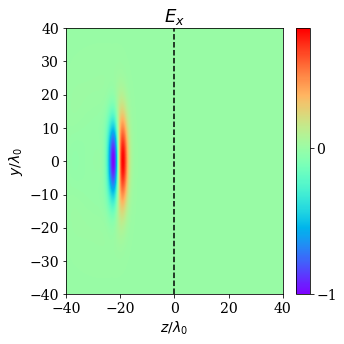

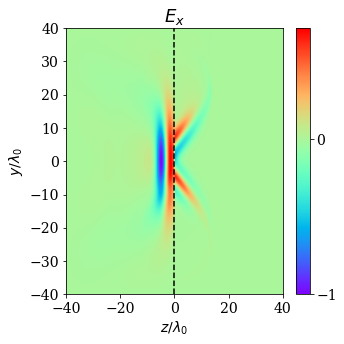

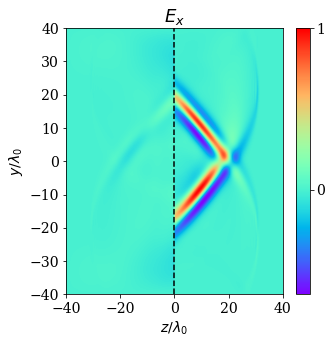

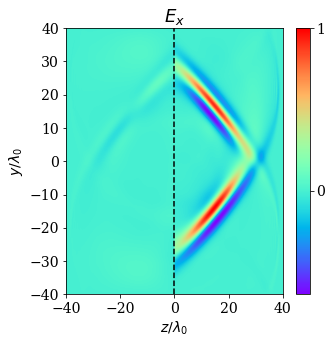

n_tot_chunk :  50
E_out_list :  [0, 50, 100, 150, 172]
0/172 0/172 1/172 2/172 3/172 4/172 5/172 6/172 7/172 8/172 9/172 10/172 11/172 12/172 13/172 14/172 15/172 16/172 17/172 18/172 19/172 20/172 21/172 22/172 23/172 24/172 25/172 26/172 27/172 28/172 29/172 30/172 31/172 32/172 33/172 34/172 35/172 36/172 37/172 38/172 39/172 40/172 41/172 42/172 43/172 44/172 45/172 46/172 47/172 48/172 49/172 
chunk 1 loaded!
50/172 51/172 52/172 53/172 54/172 55/172 56/172 57/172 58/172 59/172 60/172 61/172 62/172 63/172 64/172 65/172 66/172 67/172 68/172 69/172 70/172 71/172 72/172 73/172 74/172 75/172 76/172 77/172 78/172 79/172 80/172 81/172 82/172 83/172 84/172 85/172 86/172 87/172 88/172 89/172 90/172 91/172 92/172 93/172 94/172 95/172 96/172 97/172 98/172 99/172 
chunk 2 loaded!
100/172 101/172 102/172 103/172 104/172 105/172 106/172 107/172 108/172 109/172 110/172 111/172 112/172 113/172 114/172 115/172 116/172 117/172 118/172 119/172 120/172 121/172 122/172 123/172 124/172 125/172 126/172

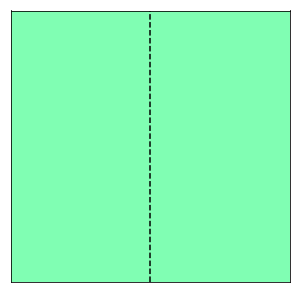

In [5]:
## animate fields
%pylab inline

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 14}
matplotlib.rc('font', **font)

figsize(5, 5)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
import os

subfold = "Gaussian"      ## Gaussian, Chirp, Gaussian_Deriv
prefix = "gaussian_to_flipderiv_downup_"    ## "gaussian_to_flip_down_", "gaussian_to_flipderiv_downup_"
use_imshow = True

## 45 degree tilted gaussian. reads from saved diagonal data
tot_params = np.load('other/ST-MS/{}/{}Params_tot.npz'.format(subfold, prefix))
n_tot_chunk = tot_params['n_tot_chunk']
y = tot_params['y']
z = tot_params['z']
Z, Y = np.meshgrid(z, y, indexing='ij')
i_file = 0
E_out_list = [0]
e_max = 0.0
while True:
    file_i_t = 'other/ST-MS/{}/{}EH_tot_{}.npz'.format(subfold, prefix, i_file)
    if os.path.exists(file_i_t):
        tot_fields = np.load(file_i_t)
        Ex_tot = tot_fields['Ex_tot_t'] 
        E_out_list.append(E_out_list[-1]+Ex_tot.shape[0])
        ei_max = np.max(np.abs(Ex_tot))
        if ei_max>e_max:
            e_max = ei_max
        
        fig = None
        if use_imshow:
            fig = imshow( Ex_tot[-1].T/np.max(np.abs(Ex_tot[-1])), \
                  cmap='rainbow', interpolation='bilinear',\
                  origin='lower', \
                  extent=[z[0], z[-1], y[0], y[-1]],\
                  aspect='auto')
            #plt.axis([-15, 15, -15, 15])
        else:
            fig = plt.gca().pcolorfast(z, y, Ex_tot[-1].T/np.max(np.abs(Ex_tot[-1])), vmin=-1, vmax=1, cmap='rainbow')
        
        
        #fig = plt.pcolormesh(Z, Y, Ex_tot[-1].T/np.max(np.abs(Ex_tot[-1])), vmin=-1, vmax=1, cmap='rainbow')
        plt.colorbar(fig, ticks=[-1, 0, 1])
        ax = plt.gca()
        ax.set_adjustable('box-forced')
        #ax.axes.get_xaxis().set_ticks([])
        #ax.axes.get_yaxis().set_ticks([])
        plt.title(r'$E_x$', fontsize=18)
        plt.xlabel(r"$z/\lambda_0$")
        plt.ylabel(r"$y/\lambda_0$")
        plt.axvline(x=0.0, linestyle="--", color='k')
        plt.tight_layout()
        savefig('other/ST-MS/{}/{}E_tot_{}.eps'.format(subfold, prefix, i_file), bbox_inches='tight')
        plt.show()
            
        i_file += 1
    else:
        break

print('n_tot_chunk : ', n_tot_chunk)
print("E_out_list : ", E_out_list)
#assert False

ind_chunk = 0
file_i_t = 'other/ST-MS/{}/{}EH_tot_{}.npz'.format(subfold, prefix, ind_chunk)
assert os.path.exists(file_i_t)
tot_fields = np.load(file_i_t)
Ex_tot_chunk = tot_fields['Ex_tot_t'] 

def load_e_tot(i):
    global ind_chunk, Ex_tot_chunk
    if i>=E_out_list[ind_chunk] and i<E_out_list[ind_chunk+1]:
        ind = None
        if ind_chunk==0:
            ind = i
        else:
            ind = i%E_out_list[ind_chunk]
        return Ex_tot_chunk[ind,:,:]
    elif i<E_out_list[-1]:
        ind_chunk_next = -1
        for j in range(len(E_out_list)-1):
            if i<E_out_list[j+1]:
                ind_chunk_next = j
                break
        assert ind_chunk_next>=0

        ind_chunk = ind_chunk_next
        assert i>=E_out_list[ind_chunk] and i<E_out_list[ind_chunk+1]

        file_i_t = 'other/ST-MS/{}/{}EH_tot_{}.npz'.format(subfold, prefix, ind_chunk)
        assert os.path.exists(file_i_t)
        tot_fields = np.load(file_i_t)
        Ex_tot_chunk = tot_fields['Ex_tot_t'] 
        
        print("\nchunk {} loaded!".format(ind_chunk))
        
        return load_e_tot(i)
    else:
        raise ValueError()
    

# Set up formatting for the movie files
#Writer = animation.writers['mencoder']    ## avconv ffmpeg mencoder
#writer = Writer(fps=15, metadata=dict(artist='Me'))
#writer = animation.FFMpegWriter()

logscale=False
log_0 = -20

save_anim = True
file_format = 'mp4'   ## 'gif' / 'mp4'

font = {'family' : 'serif', 'weight' : 'normal', 'size' : 14}
matplotlib.rc('font', **font)

fig = None


def animate_E(i):
    plt.clf()
    if not logscale:
        E = load_e_tot(i)/e_max
        #fig = plt.imshow(E.T, origin='lower', vmin=-1, vmax=1, cmap='rainbow', aspect='auto')
        if use_imshow:
            fig = imshow( E.T, \
                  cmap='rainbow', interpolation='bilinear',\
                  origin='lower', \
                  extent=[z[0], z[-1], y[0], y[-1]],\
                  vmin=-1, vmax=1, aspect='auto')
            #plt.axis([-15, 15, -15, 15])
        else:
            fig = plt.gca().pcolorfast(z, y, E.T, vmin=-1, vmax=1, cmap='rainbow')
    else:
        E = load_e_tot(i)/e_max
        E_log = np.log(np.abs(E))
        E_log = (E_log>=log_0)*E_log + (E_log<log_0)*(log_0)
        fig = plt.gca().pcolorfast(z, y, E_log.T, vmin=log_0, vmax=0, cmap='rainbow')

    #CB = plt.colorbar(fig, shrink=0.8, extend='both')
    ax = plt.gca()
    ax.set_adjustable('box-forced')
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    plt.axvline(x=0.0, linestyle="--", color='k')
    #plt.colorbar()
    print("{}/{}".format(i, E_out_list[-1]) , end=" ")
    return fig

fig = plt.figure()
axes = plt.gca()
anim = None
anim = animation.FuncAnimation(fig, animate_E, frames=E_out_list[-1], interval=1, repeat=False)

if save_anim:
    if file_format=='gif':
        anim.save('other/ST-MS/{}/{}EH_tot_anim.gif'.format(subfold, prefix), writer="imagemagick", fps=15, dpi=200)
    elif file_format=='mp4':
        anim.save('other/ST-MS/{}/{}EH_tot_anim.mp4'.format(subfold, prefix), writer="ffmpeg", fps=15, dpi=200)
plt.show()

    

Populating the interactive namespace from numpy and matplotlib
other/ST-MS/Gaussian/gaussian_diffract_X_0.npz
other/ST-MS/Gaussian/gaussian_diffract_X_1.npz
max:  nan


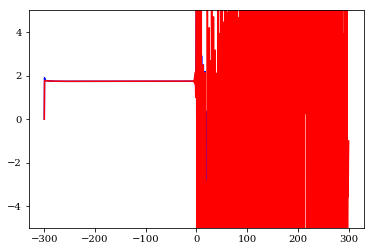

other/ST-MS/Gaussian/gaussian_diffract_X_2.npz
max:  6512426.54821


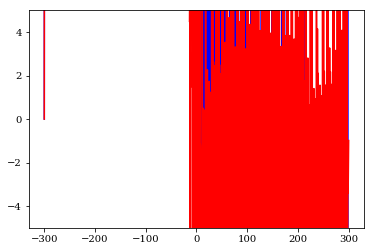

other/ST-MS/Gaussian/gaussian_diffract_X_3.npz
max:  26555419.9739


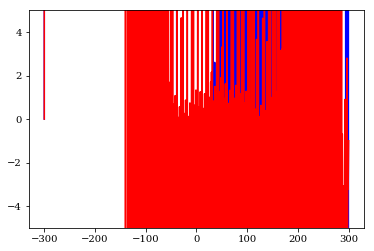

other/ST-MS/Gaussian/gaussian_diffract_X_4.npz
max:  31464782.8373


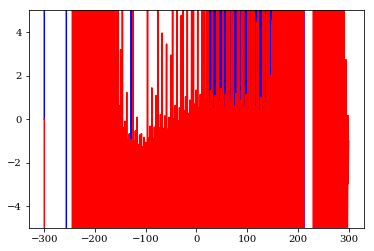

other/ST-MS/Gaussian/gaussian_diffract_X_5.npz
max:  553524.479683


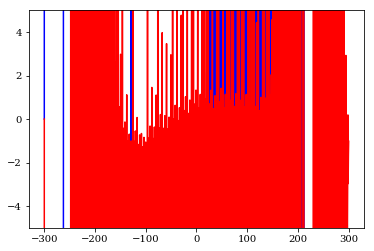

other/ST-MS/Gaussian/gaussian_diffract_X_6.npz
X_out_list :  [0, 200, 400, 600, 800, 1000, 1001]


AssertionError: 

In [21]:
### plot susceptibilities
%pylab inline 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
import os

subfold = "Gaussian"      ## Gaussian, Chirp, Gaussian_Deriv
prefix = "gaussian_diffract_"    ## "chirp_down_to_up_", "gaussian_to_derives_"

## 45 degree tilted gaussian. reads from saved diagonal data
X_params = np.load('other/ST-MS/{}/{}Params_vert.npz'.format(subfold, prefix))
nv_chunk = X_params['nv_chunk']
y = X_params['y']
dy = X_params['dy']

i_file = 0
X_out_list = [0]

while True:
    file_i_t = 'other/ST-MS/{}/{}X_{}.npz'.format(subfold, prefix, i_file)
    print(file_i_t)
    if os.path.exists(file_i_t):
        X_file = np.load(file_i_t)
        X_ee = X_file['X_ee_t'] 
        X_mm = X_file['X_mm_t'] 
        X_out_list.append(X_out_list[-1]+X_ee.shape[0])
        i_file += 1
        if i_file>1:
            plt.plot(y, X_ee[-1,:]/(dy/2), 'b')
            plt.plot(y, X_mm[-1,:]/(dy/2), 'r')
            plt.ylim(-5.0, 5.0)
            print("max: ", np.max(np.abs(X_ee)))
            plt.show()
    else:
        break

print("X_out_list : ", X_out_list)

ind_chunk = 0
file_i_t = 'other/ST-MS/{}/{}X_{}.npz'.format(subfold, prefix, ind_chunk)
assert os.path.exists(file_i_t)
X_file = np.load(file_i_t)
X_ee_chunk = X_file['X_ee_t'] 
X_mm_chunk = X_file['X_mm_t'] 

def load_X_eemm(i):
    global ind_chunk, X_ee_chunk, X_mm_chunk
    if i>=X_out_list[ind_chunk] and i<X_out_list[ind_chunk+1]:
        ind = None
        if ind_chunk==0:
            ind = i
        else:
            ind = i%X_out_list[ind_chunk]
        return X_ee_chunk[ind,:], X_mm_chunk[ind,:]
    elif i<X_out_list[-1]:
        ind_chunk_next = -1
        for j in range(len(X_out_list)-1):
            if i<X_out_list[j+1]:
                ind_chunk_next = j
                break
        assert ind_chunk_next>=0

        ind_chunk = ind_chunk_next
        assert i>=X_out_list[ind_chunk] and i<X_out_list[ind_chunk+1]

        file_i_t = 'other/ST-MS/{}/{}X_{}.npz'.format(subfold, prefix, ind_chunk)
        assert os.path.exists(file_i_t)
        X_file = np.load(file_i_t)
        X_ee_chunk = X_file['X_ee_t'] 
        X_mm_chunk = X_file['X_mm_t'] 
        
        print("\nchunk {} loaded!".format(ind_chunk))
        
        return load_X_eemm(i)
    else:
        raise ValueError()
    

assert False

    
# Set up formatting for the movie files
#Writer = animation.writers['mencoder']    ## avconv ffmpeg mencoder
#writer = Writer(fps=15, metadata=dict(artist='Me'))
#writer = animation.FFMpegWriter()

plot_anim = False
save_anim = False
file_format = 'mp4'   ## 'gif' / 'mp4'

font = {'family' : 'serif', 'weight' : 'normal', 'size' : 14}
matplotlib.rc('font', **font)

fig = None


def animate_X(i):
    plt.clf()
    X_ee, X_mm = load_X_eemm(i)
    fig = plt.plot(y, X_ee/(dy/2), 'r')
    plt.plot(y, X_mm/(dy/2), 'b')

    ax = plt.gca()
    ax.set_adjustable('box-forced')
    #ax.axes.get_xaxis().set_ticks([])
    #ax.axes.get_yaxis().set_ticks([])
    print("{}/{}".format(i, X_out_list[-1]) , end=" ")
    plt.ylim([-0.5, 0.5])
    return fig

fig = plt.figure()
axes = plt.gca()
anim = None
if plot_anim:
    anim = animation.FuncAnimation(fig, animate_X, frames=X_out_list[-1], interval=1, repeat=False)

    if save_anim:
        if file_format=='gif':
            anim.save('other/ST-MS/{}/{}X_anim.gif'.format(subfold, prefix), writer="imagemagick", fps=15, dpi=200)
        elif file_format=='mp4':
            anim.save('other/ST-MS/{}/{}X_anim.mp4'.format(subfold, prefix), writer="ffmpeg", fps=15, dpi=200)
    plt.show()




chunk 0 loaded!
(1201,)

chunk 1 loaded!

chunk 2 loaded!

chunk 3 loaded!

chunk 4 loaded!

chunk 5 loaded!
_N_t_tot:  1001   _N_t : 1001   X_ee_tot.shape: (1001, 1201)


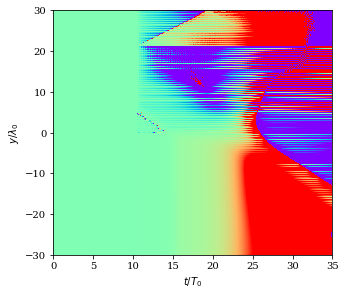

(1001, 1201)


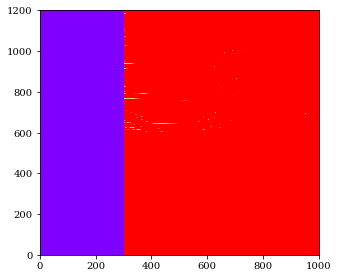

_N_t_tot:  1001   _N_t : 1001   X_mm_tot.shape: (1001, 1201)


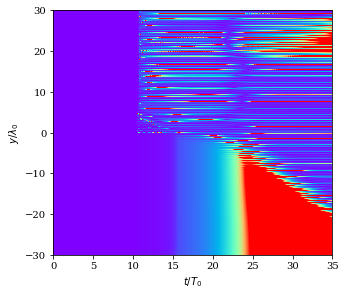

(1001, 1201)


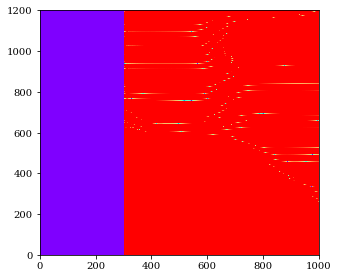

In [25]:

X_ee, X_mm = load_X_eemm(0)
print(X_ee.shape)

X_ee_max = 20.0
X_mm_max = X_ee_max

X_ee_tot = np.zeros((X_out_list[-1], X_ee.shape[0]))
X_mm_tot = np.zeros(X_ee_tot.shape)
for i in range(X_out_list[-1]):
    X_ee, X_mm = load_X_eemm(i)
    X_ee_tot[i, :] = X_ee
    X_mm_tot[i, :] = X_mm
    #print(np.max(np.abs(X_ee-X_mm)))


X_ee_tot = np.nan_to_num(X_ee_tot)
X_ee_tot = X_ee_tot*np.isfinite(X_ee_tot)
X_ee_mag = np.abs(X_ee_tot)
X_ee_tot = (np.abs(X_ee_tot)<=X_ee_max)*X_ee_tot + (X_ee_tot>X_ee_max)*X_ee_max - (X_ee_tot<-X_ee_max)*X_ee_max

figsize(5, 4.5)
T_0_per = (2.0*np.pi/w_0)
t_start = 0*T_0_per
_N_t = int(X_out_list[-1]*(t_max-t_start)/t_max)
_N_t_tot = X_out_list[-1]
print("_N_t_tot: ", _N_t_tot, "  _N_t :", _N_t, "  X_ee_tot.shape:", X_mm_tot.shape)
t_samps = np.linspace(t_start, t_max, _N_t)/T_0_per
y_samps = np.linspace(y0, y1, (X_ee.shape)[0])/T_0_per
#gca().pcolorfast(t_samps, y_samps, np.abs(X_ee_tot[-_N_t:,:]).T, cmap="rainbow")
gca().pcolorfast(t_samps, y_samps, X_ee_tot[-_N_t:,:].T, cmap="rainbow")
xlabel('$t/T_0$')
ylabel('$y/\lambda_0$')

savefig('other/ST-MS/{}/{}X_ee_all.eps'.format(subfold, prefix), bbox_inches='tight', pad_inches=0.0)
show()

print(X_ee_mag.shape)

X_mag_max = +0.1
X_mag_min = 0.0001
X_ee_mag = np.logical_and(X_ee_mag<=X_mag_max, X_ee_mag>=X_mag_min)*X_ee_mag + (X_ee_mag>X_mag_max)*X_mag_max + (X_ee_mag<X_mag_min)*X_mag_min
X_ee_mag = np.log10(X_ee_mag)

gca().pcolorfast(X_ee_mag[:,:].T, vmin=np.log10(X_mag_min), vmax=np.log10(X_mag_max), cmap="rainbow")

savefig('other/ST-MS/{}/{}X_ee_mag.eps'.format(subfold, prefix), bbox_inches='tight', pad_inches=0.5)
show()

##--------------------

X_mm_tot = np.nan_to_num(X_mm_tot)
X_mm_tot = X_mm_tot*np.isfinite(X_mm_tot)
X_mm_mag = np.abs(X_mm_tot)
X_mm_tot = (np.abs(X_mm_tot)<=X_mm_max)*X_mm_tot + (X_mm_tot>X_mm_max)*X_mm_max - (X_mm_tot<-X_mm_max)*X_mm_max

figsize(5, 4.5)
T_0_per = (2.0*np.pi/w_0)
t_start = 0*T_0_per
_N_t = int(X_out_list[-1]*(t_max-t_start)/t_max)
_N_t_tot = X_out_list[-1]
print("_N_t_tot: ", _N_t_tot, "  _N_t :", _N_t, "  X_mm_tot.shape:", X_mm_tot.shape)
t_samps = np.linspace(t_start, t_max, _N_t)/T_0_per
y_samps = np.linspace(y0, y1, (X_mm.shape)[0])/T_0_per
gca().pcolorfast(t_samps, y_samps, np.abs(X_mm_tot[-_N_t:,:]).T, cmap="rainbow")
xlabel('$t/T_0$')
ylabel('$y/\lambda_0$')

savefig('other/ST-MS/{}/{}X_mm_all.eps'.format(subfold, prefix), bbox_inches='tight', pad_inches=0.0)
show()

print(X_mm_mag.shape)

X_mag_max = +0.1
X_mag_min = 0.0001
X_mm_mag = np.logical_and(X_mm_mag<=X_mag_max, X_mm_mag>=X_mag_min)*X_mm_mag + (X_mm_mag>X_mag_max)*X_mag_max + (X_mm_mag<X_mag_min)*X_mag_min
X_mm_mag = np.log10(X_mm_mag)

gca().pcolorfast(X_mm_mag[:,:].T, vmin=np.log10(X_mag_min), vmax=np.log10(X_mag_max), cmap="rainbow")

savefig('other/ST-MS/{}/{}X_mm_mag.eps'.format(subfold, prefix), bbox_inches='tight', pad_inches=0.5)
show()


### pulses

Populating the interactive namespace from numpy and matplotlib


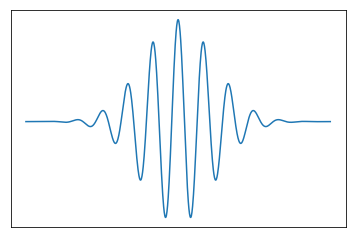

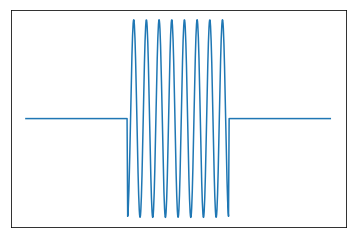

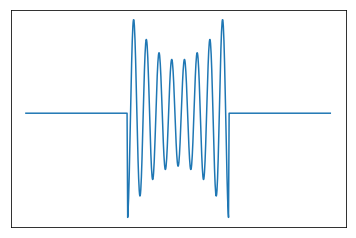

In [11]:
%pylab inline
import numpy as np

N = 1000
z = np.linspace(-3, 3, N)
fz_gauss = np.exp(-z**2)*np.cos(4*np.pi*z)
fz_rect = 0.5*(np.sign(z-1) - np.sign(z+1))*np.cos(8*np.pi*z)
fz_bat = 0.5*(1+z**2)*(np.sign(z-1) - np.sign(z+1))*np.cos(8*np.pi*z)

plot(z, fz_gauss)
gca().set_xticks([])
gca().set_yticks([])
savefig('other/ST-MS/fz_gauss.eps', bbox_inches='tight', pad_inches=0.0)
show()

plot(z, fz_rect)
gca().set_xticks([])
gca().set_yticks([])
savefig('other/ST-MS/fz_rect.eps', bbox_inches='tight', pad_inches=0.0)
show()

plot(z, fz_bat)
gca().set_xticks([])
gca().set_yticks([])
savefig('other/ST-MS/fz_bat.eps', bbox_inches='tight', pad_inches=0.0)
show()


